<a href="https://colab.research.google.com/github/Abhijith-Nagarajan/PadhAI_Implementations/blob/main/PyTorch_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

In [4]:
train_df = torchvision.datasets.CIFAR10(root='./data',
                                        train = True,
                                        download = True,
                                        transform = transforms.ToTensor())

100%|██████████| 170498071/170498071 [00:04<00:00, 41166654.91it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [5]:
train_loader = torch.utils.data.DataLoader(train_df,batch_size = 8,shuffle = True)

### Visualizing images

In [ ]:
data_iter = iter(train_loader)

In [ ]:
images, labels = next(data_iter)

In [ ]:
labels

tensor([8, 8, 9, 2, 8, 3, 6, 2])

In [ ]:
img = images[0]

In [ ]:
np_img = img.numpy()

In [ ]:
np_img.shape

(3, 32, 32)

In [ ]:
transposed_np_img = np.transpose(np_img,(1,2,0))

In [ ]:
transposed_np_img.shape

(32, 32, 3)

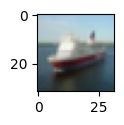

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(transposed_np_img)
plt.show()

# Building the LeNet model

In [6]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        # Module 1 - CNN block
        self.cnn_module = nn.Sequential(
                            nn.Conv2d(3,6,5),            # (32,32,3) --> (28,28,6) [6 filters used with 5x5 filter size]
                            nn.ReLU(),                   # Originally used Tanh
                            nn.AvgPool2d(2,stride=2),     # (28,28,6) --> (14,14,6)
                            nn.Conv2d(6,16,5),            # (14,14,6) --> (10,10,16)
                            nn.ReLU(),                   # Originally used Tanh
                            nn.AvgPool2d(2,stride=2)      # (10,10,16) --> (5,5,16)
        )
        # Module 2 - FCN block
        self.ffn_module = nn.Sequential(
                            nn.Linear(400,120),           # 5*5*16 = 400 -> Flatten image
                            nn.ReLU(),
                            nn.Linear(120,84),
                            nn.ReLU(),
                            nn.Linear(84,10)
        )

    def forward(self,image):
        x = self.cnn_module(image)
        x = x.view(x.size(0),-1) # To flatten the image for FCN
        x = self.ffn_module(x)
        return x


### Testing with one image

In [7]:
model = LeNet()

In [ ]:
output = model(images)

In [ ]:
print(output)

tensor([[ 0.0414, -0.0220, -0.0658,  ..., -0.0767, -0.1426,  0.1052],
        [ 0.0442, -0.0035, -0.0585,  ..., -0.0773, -0.1488,  0.0993],
        [ 0.0297, -0.0136, -0.0463,  ..., -0.0803, -0.1513,  0.0893],
        ...,
        [ 0.0526, -0.0240, -0.0634,  ..., -0.0774, -0.1452,  0.1041],
        [ 0.0480, -0.0325, -0.0747,  ..., -0.0935, -0.1171,  0.1044],
        [ 0.0282, -0.0058, -0.0508,  ..., -0.0832, -0.1512,  0.0905]],
       grad_fn=<AddmmBackward0>)


In [ ]:
output.shape

torch.Size([128, 10])

In [ ]:
max_vals, pred_class = torch.max(output.data,1)

In [ ]:
print(pred_class)

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4])


### Building model with training loop

In [ ]:
model = LeNet()

In [8]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(),lr=0.0001,weight_decay = 0.001)

In [9]:
loss_per_image = []
epochs = 5

In [ ]:
def evaluate():
    '''
    '''

In [11]:
total, correct = 0,0
for epoch in range(epochs):
    #batch = 1
    for i, data in enumerate(train_loader,0):
        images, labels = data
        opt.zero_grad()

        labels = labels.to(torch.float)
        #print(f"Actual Labels:\n",labels)

        predictions = model(images)
        #print(f"\nPredictions object:\n",predictions)

        _, pred_class = torch.max(predictions.data,1)
        pred_class = pred_class.to(torch.float)
        #print(f"\nPredictions Data object:\n",pred_class)

        loss = loss_fn(pred_class,labels)
        #print(f'\nLoss: ',loss)

        total+= labels.size(0)
        correct+= (labels==pred_class).sum().item()
        loss_per_image.append(loss.item())

        loss.requires_grad = True
        loss.backward()
        opt.step()

        '''
        if batch == 1:
            print('Exiting loop')
            break

        print('Loop not exited')
        '''

In [12]:
total, correct

(250000, 25000)

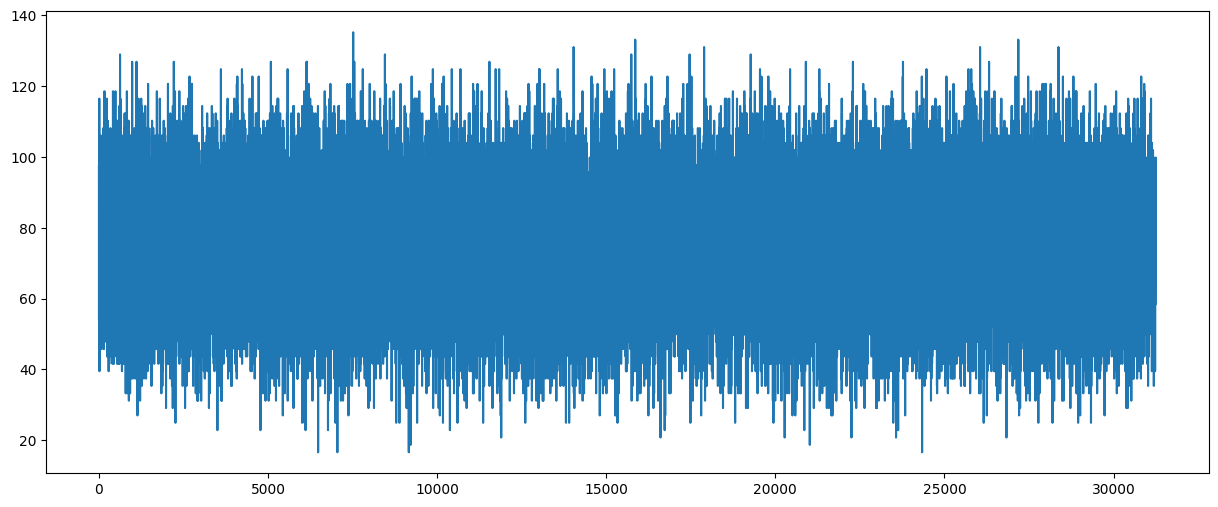

In [30]:
plt.figure(figsize=(15,6))
plt.plot(loss_per_image)
plt.show()